Đọc nội dung từ file: results.csv

Dữ liệu từ results.csv:
                 Agent    Map  Total_Reward  Delivered_Packages  Total_Steps
0          GreedyAgent  Map 1         39.41                   4         1000
1   OptimizedFlowAgent  Map 1        396.81                  58         1000
2           DeepQAgent  Map 1       -178.96                   0         1000
3          GreedyAgent  Map 2         48.81                   5         1000
4   OptimizedFlowAgent  Map 2        168.36                  33         1000
5           DeepQAgent  Map 2       -105.35                   0         1000
6          GreedyAgent  Map 3         29.14                   3         1000
7   OptimizedFlowAgent  Map 3        226.11                  52         1000
8           DeepQAgent  Map 3       -302.13                   0         1000
9          GreedyAgent  Map 4         48.01                   5         1000
10  OptimizedFlowAgent  Map 4        -14.24                   8         1000
11          DeepQ

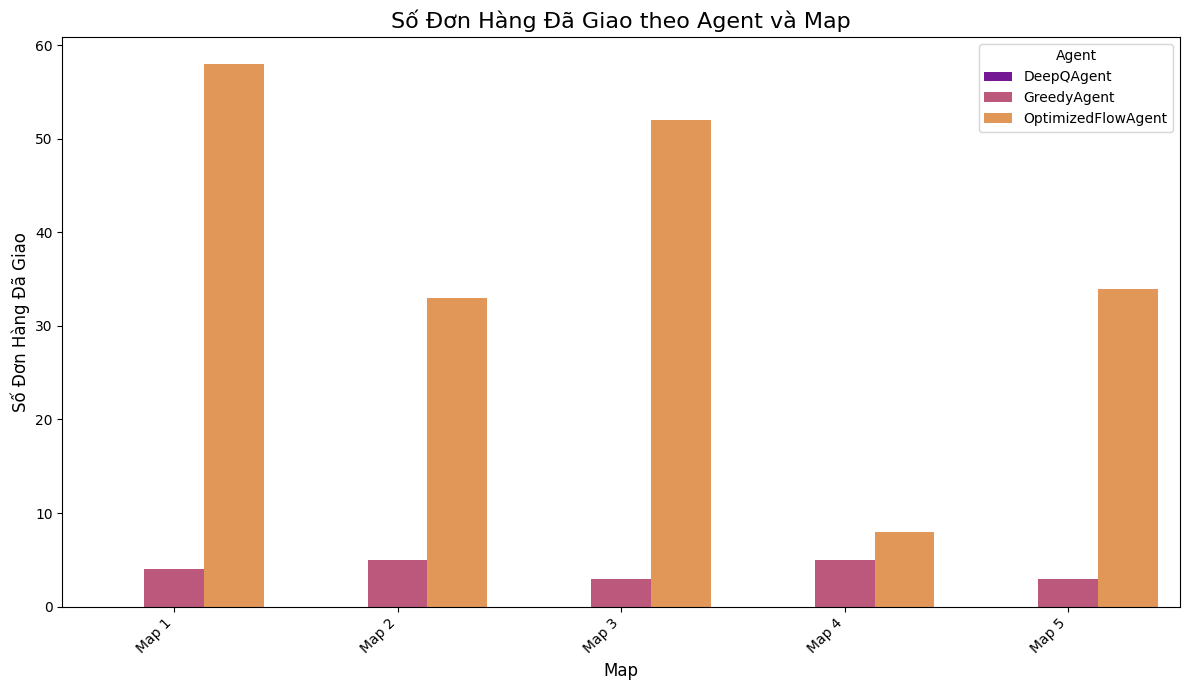


Trực quan hóa kết quả đã hoàn tất.


In [10]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

results_file_path = "results.csv"

if os.path.exists(results_file_path):
    print(f"Đọc nội dung từ file: {results_file_path}\n")
    try:
        df_results = pd.read_csv(results_file_path)

        print("Dữ liệu từ results.csv:")
        df_display = df_results.copy()
        df_display['Map'] = df_display['Map'].apply(lambda x: os.path.basename(x).replace('.txt', '').replace('map', 'Map '))
        df_display = df_display.drop(columns=['Num_Agents', 'Num_Packages'])
        print(df_display)
        
        print("Bắt đầu trực quan hóa kết quả...")
        df_results['Map_Name'] = df_results['Map'].apply(lambda x: os.path.basename(x).replace('.txt', '').replace('map', 'Map '))
        df_results_sorted = df_results.sort_values(by=['Map_Name', 'Agent'])
        plt.figure(figsize=(12, 7))
        sns.barplot(x='Map_Name', y='Delivered_Packages', hue='Agent', data=df_results_sorted, palette='plasma')
        plt.title('Số Đơn Hàng Đã Giao theo Agent và Map', fontsize=16)
        plt.xlabel('Map', fontsize=12)
        plt.ylabel('Số Đơn Hàng Đã Giao', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Agent')
        plt.tight_layout()
        plt.show()
        print("\nTrực quan hóa kết quả đã hoàn tất.")

    except Exception as e:
        print(f"Lỗi khi đọc hoặc trực quan hóa file CSV: {e}")
else:
    print(f"File '{results_file_path}' không tồn tại. Vui lòng đảm bảo code đã chạy và tạo file.")